In [1]:
import pandas as pd

data = pd.read_csv('data/data2019.csv')

In [2]:
data.rename(columns={'netImbalanceVolume': 'target'}, inplace=True)
data['date'] = data['date'].apply(lambda x: x[:-6])
data['date'] = pd.to_datetime(data['date'])
data['id'] = 1

In [ ]:
from autogluon.timeseries.utils.forecast import get_forecast_horizon_index_ts_dataframe

future_index = get_forecast_horizon_index_ts_dataframe(train_data, prediction_length=14)
future_timestamps = future_index.get_level_values("timestamp")
known_covariates = pd.DataFrame(index=future_index)
known_covariates["weekend"] = future_timestamps.weekday.isin(WEEKEND_INDICES).astype(float)

known_covariates.head()

In [ ]:
import holidays

timestamps = train_data.index.get_level_values("timestamp")
country_holidays = holidays.country_holidays(
    country="DE",  # make sure to select the correct country/region!
    # Add + 1 year to make sure that holidays are initialized for the forecast horizon
    years=range(timestamps.min().year, timestamps.max().year + 1),
)
# Convert dict to pd.Series for pretty visualization
pd.Series(country_holidays).sort_index().head()

In [ ]:
from autogluon.timeseries import TimeSeriesDataFrame

def add_holiday_features(
    ts_df: TimeSeriesDataFrame, 
    country_holidays: dict,
    include_individual_holidays: bool = True,
    include_holiday_indicator: bool = True,
) -> TimeSeriesDataFrame:
    """Add holiday indicator columns to a TimeSeriesDataFrame."""
    ts_df = ts_df.copy()
    timestamps = ts_df.index.get_level_values("timestamp")
    country_holidays_df = pd.get_dummies(pd.Series(country_holidays)).astype(float)
    holidays_df = country_holidays_df.reindex(timestamps.date).fillna(0)
    if include_individual_holidays:
        ts_df[holidays_df.columns] = holidays_df.values
    if include_holiday_indicator:
        ts_df["Holiday"] = holidays_df.max(axis=1).values
    return ts_df

In [30]:
WEEKEND_INDICES = [6, 7]

data['day'] = data['date'].dt.day


,date,hour,target,smp,mcp,mcpUsd,damVolume,idm,upRegulationZeroCoded,downRegulationZeroCoded,...,exchangeRate,windGeneration,solarGeneration,canalGeneration,riverGeneration,reservoirGeneration,smpUsd,ImbalanceToVolumeRatio,id,day
144,2019-01-07 00:00:00,0,-1176.66,100.10,200.01,36.98,14409.1,200.09,181.93,1487.15,...,5.408599,1722.01,0.00,2238.91,170.96,2528.33,18.507565,-0.081661,1,7
145,2019-01-07 01:00:00,1,-406.94,178.08,198.74,36.74,14266.9,198.86,101.50,674.75,...,5.409363,1682.04,0.00,2214.87,168.53,2499.23,32.920696,-0.028523,1,7
146,2019-01-07 02:00:00,2,-403.69,112.60,113.79,21.04,13955.6,114.67,0.00,428.47,...,5.408270,1722.54,0.00,2353.44,221.68,2846.90,20.819967,-0.028927,1,7
147,2019-01-07 03:00:00,3,-579.67,119.20,198.75,36.75,13305.2,200.50,0.00,685.00,...,5.408163,1792.91,0.00,2292.64,218.50,2737.34,22.040755,-0.043567,1,7
148,2019-01-07 04:00:00,4,467.44,106.27,76.27,14.10,13507.0,77.12,702.33,0.00,...,5.409220,1814.81,0.00,2361.65,250.23,3195.75,19.646086,0.034607,1,7
149,2019-01-07 05:00:00,5,391.95,120.00,112.29,20.76,13518.1,116.61,800.63,0.00,...,5.408960,1738.73,0.00,2375.63,251.45,3190.49,22.185413,0.028994,1,7
150,2019-01-07 06:00:00,6,520.38,251.24,251.24,46.45,14545.2,250.90,952.38,0.00,...,5.408827,1524.92,0.00,2364.55,242.19,3013.52,46.450000,0.035777,1,7
151,2019-01-07 07:00:00,7,655.97,285.24,285.24,52.74,17029.0,285.90,791.40,0.00,...,5.408419,1535.68,0.08,2419.19,223.24,2604.17,52.740000,0.038521,1,7
152,2019-01-07 08:00:00,8,1643.07,330.00,289.90,53.60,19918.0,288.92,2822.95,291.23,...,5.408582,1612.47,3.51,2541.02,212.63,2807.58,61.014143,0.082492,1,7
153,2019-01-07 09:00:00,9,2104.92,401.10,291.34,53.86,21078.3,291.98,2951.40,54.25,...,5.409209,1664.09,19.34,2516.96,226.97,3172.78,74.151321,0.099862,1,7


In [3]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, shuffle=False)

In [36]:
import holidays

timestamps = train_data.index.get_level_values("timestamp")
country_holidays = holidays.country_holidays(
    country="TR",  # make sure to select the correct country/region!
    # Add + 1 year to make sure that holidays are initialized for the forecast horizon
    years=range(timestamps.min().year, timestamps.max().year + 1),
)
# Convert dict to pd.Series for pretty visualization
pd.Series(country_holidays).sort_index().head()

2019-01-01                                    Yılbaşı
2019-04-23          Ulusal Egemenlik ve Çocuk Bayramı
2019-05-01                     Emek ve Dayanışma Günü
2019-05-19    Atatürk'ü Anma, Gençlik ve Spor Bayramı
2019-06-04                            Ramazan Bayramı
dtype: object

In [5]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

train_data = TimeSeriesDataFrame.from_data_frame(
    train_data,
    id_column="id",
    timestamp_column="date",
)

test_data = TimeSeriesDataFrame.from_data_frame(
    test_data,
    id_column="id",
    timestamp_column="date",
)




In [23]:
predictor = TimeSeriesPredictor(
    prediction_length=24,
    path="basic_model",
    target="target",
    eval_metric="MSE",
)

predictor.fit(
    train_data,
    presets="medium_quality",
    time_limit=600,
)

Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to 'basic_model'
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.1.0: Mon Oct  9 21:28:31 PDT 2023; root:xnu-10002.41.9~6/RELEASE_ARM64_T8112
CPU Count:          8
GPU Count:          0
Memory Avail:       6.09 GB / 16.00 GB (38.1%)
Disk Space Avail:   99.44 GB / 460.43 GB (21.6%)
Setting presets to: medium_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MAPE,
 'hyperparameters': 'light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'target',
 'time_limit': 600,
 'verbosity': 2}

Inferred time series frequency: 'h'
Pr

In [24]:
predictions = predictor.predict(train_data)
predictions.head()

Model not specified in predict, will default to the model with the best validation score: TemporalFusionTransformer


mean         0.1         0.2         0.3  \
item_id timestamp                                                             
1       2019-10-20 00:00:00 -150.704651 -676.409668 -590.634644 -386.315063   
        2019-10-20 01:00:00 -104.282593 -674.545044 -579.359558 -348.078796   
        2019-10-20 02:00:00  -63.098633 -659.992554 -557.158386 -314.512878   
        2019-10-20 03:00:00  -32.801056 -642.184998 -533.045349 -286.161011   
        2019-10-20 04:00:00  -22.302887 -640.100708 -524.714233 -275.884705   

                                    0.4         0.5         0.6         0.7  \
item_id timestamp                                                             
1       2019-10-20 00:00:00 -165.368286 -150.704651  -21.164581   70.664581   
        2019-10-20 01:00:00 -139.162537 -104.282593   33.140594  120.257751   
        2019-10-20 02:00:00 -112.376923  -63.098633   80.918762  175.523529   
        2019-10-20 03:00:00  -89.991638  -32.801056  113.337601  222.199631   
        2019-10-20 04:00:00  -86.971832  -22.302887  120.866516  244.463409   

                                    0.8         0.9  
item_id timestamp                                    
1       2019-10-20 00:00:00  141.077576  396.875549  
        2019-10-20 01:00:00  200.977051  447.007446  
        2019-10-20 02:00:00  261.302185  499.473145  
        2019-10-20 03:00:00  310.141266  543.613586  
        2019-10-20 04:00:00  335.776978  564.995605

In [25]:
test_data.head()

hour  target     smp     mcp  mcpUsd  damVolume  \
item_id timestamp                                                              
1       2019-10-20 00:00:00     0  -80.25  294.99  304.99   52.87    12614.9   
        2019-10-20 01:00:00     1   82.50  310.73  310.73   53.86    12987.7   
        2019-10-20 02:00:00     2    0.00  310.27  310.27   53.78    12669.5   
        2019-10-20 03:00:00     3    0.00  311.08  311.08   53.92    12033.2   
        2019-10-20 04:00:00     4 -118.51  301.01  311.01   53.91    11656.2   

                                idm  upRegulationZeroCoded  \
item_id timestamp                                            
1       2019-10-20 00:00:00  302.41                    0.0   
        2019-10-20 01:00:00  303.70                  105.0   
        2019-10-20 02:00:00  301.99                    0.0   
        2019-10-20 03:00:00  303.36                    0.0   
        2019-10-20 04:00:00  303.54                    0.0   

                             downRegulationZeroCoded  upRegulationDelivered  \
item_id timestamp                                                             
1       2019-10-20 00:00:00                    80.25                    0.0   
        2019-10-20 01:00:00                    22.50                  105.0   
        2019-10-20 02:00:00                     0.00                    0.0   
        2019-10-20 03:00:00                     0.00                    0.0   
        2019-10-20 04:00:00                   160.10                    0.0   

                             downRegulationDelivered  exchangeRate  \
item_id timestamp                                                    
1       2019-10-20 00:00:00                   -80.25      5.768678   
        2019-10-20 01:00:00                   -22.50      5.769216   
        2019-10-20 02:00:00                     0.00      5.769245   
        2019-10-20 03:00:00                     0.00      5.769288   
        2019-10-20 04:00:00                  -118.51      5.769060   

                             windGeneration  solarGeneration  canalGeneration  \
item_id timestamp                                                               
1       2019-10-20 00:00:00          581.69              0.0           670.04   
        2019-10-20 01:00:00          504.44              0.0           656.10   
        2019-10-20 02:00:00          463.26              0.0           630.84   
        2019-10-20 03:00:00          476.72              0.0           610.81   
        2019-10-20 04:00:00          507.34              0.0           666.35   

                             riverGeneration  reservoirGeneration     smpUsd  \
item_id timestamp                                                              
1       2019-10-20 00:00:00            45.35              1187.44  51.136501   
        2019-10-20 01:00:00            44.87              1197.58  53.860000   
        2019-10-20 02:00:00            34.85              1129.12  53.780000   
        2019-10-20 03:00:00            34.80              1212.93  53.920000   
        2019-10-20 04:00:00            31.96              1216.97  52.176615   

                             ImbalanceToVolumeRatio  
item_id timestamp                                    
1       2019-10-20 00:00:00               -0.006362  
        2019-10-20 01:00:00                0.006352  
        2019-10-20 02:00:00                0.000000  
        2019-10-20 03:00:00                0.000000  
        2019-10-20 04:00:00               -0.010167

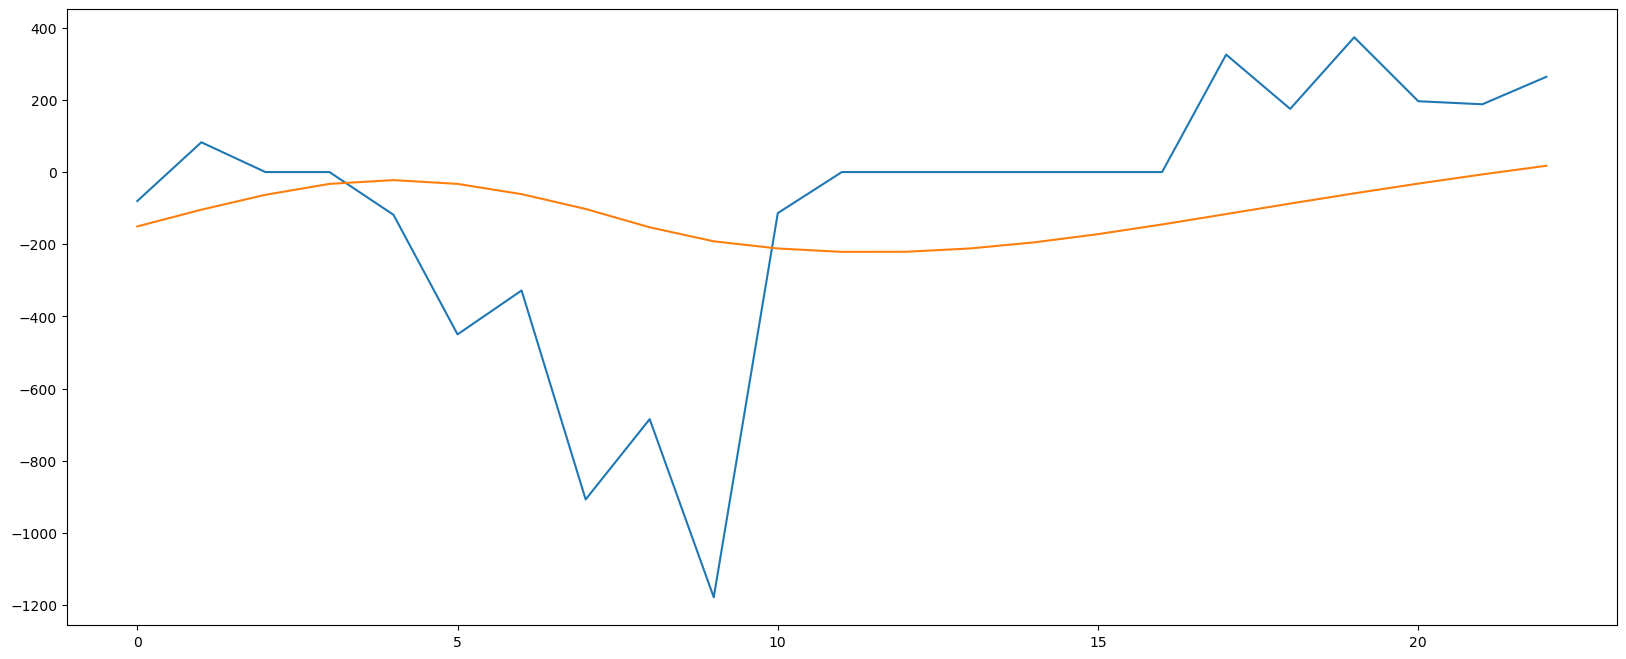

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(list(test_data[:23]['target']), label="target")
plt.plot(list(predictions["mean"][:23]), label="mean")

In [18]:
list(test_data[:23]['target'])

[-80.25,
 82.5,
 0.0,
 0.0,
 -118.51,
 -449.79,
 -328.15,
 -907.1,
 -684.59,
 -1178.22,
 -113.78,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 325.45,
 175.02,
 373.43,
 196.23,
 187.79,
 263.88]